# AlertAI - Data Pre-Processing 
This notebook is responsible for the development of the data prepocessing unit that will in de future be integrated in the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Data Preparation
4. Re-Write processed Data

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [214]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import shuffle

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [41]:
dataSensor1 = pd.read_csv("sensor1_raw.csv") 
dataSensor2 = pd.read_csv("sensor2_raw.csv") 
dataSensor1.head()

,sensor1.id,sensor1.carId,sensor1.carLocation,sensor1.timeValue,sensor1.pm25,sensor1.pm10
0,15,VP-35-44,41.5608 -8.3968,2020-11-20 14:30:59,2.4,5.5
1,14,VP-35-44,41.5608 -8.3968,2020-11-20 14:22:31,2.3,4.5
2,13,VP-35-44,41.5608 -8.3968,2020-11-20 14:22:20,2.3,4.5
3,12,VP-35-44,41.5608 -8.3968,2020-11-20 14:22:10,2.3,4.5
4,11,VP-35-44,41.5608 -8.3968,2020-11-20 11:52:56,2.5,4.8


## 3. Data Pre-processing
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Null Values Verification & Elimination

Here we are going to validate the datasets: checking if there are missing values and try to avoid them: deleting or replace them for the most common values of the respectively feature

In [27]:
#Missing values verification for whole dataset
nullValues1 = dataSensor1.isnull().values.sum()
nullValues2 = dataSensor2.isnull().values.sum()

print("Dataset1: Missing values ",nullValues1)
print("Dataset2: Missing values ", nullValues2)

Dataset1: Missing values  0
Dataset2: Missing values  0


In [28]:
#Missing values for each feature

In [29]:
print("---------Dataset Sensor 1 ------------")
print(dataSensor1.isnull().sum())
print("---------Dataset Sensor 2 ------------")
print(dataSensor2.isnull().sum())

---------Dataset Sensor 1 ------------
sensor1.id             0
sensor1.carId          0
sensor1.carLocation    0
sensor1.timeValue      0
sensor1.pm25           0
sensor1.pm10           0
dtype: int64
---------Dataset Sensor 2 ------------
sensor2.id             0
sensor2.carId          0
sensor2.carLocation    0
sensor2.timeValue      0
sensor2.temperature    0
sensor2.gas            0
sensor2.humidity       0
sensor2.pressure       0
sensor2.altitude       0
dtype: int64


In [30]:
#Describe the dataset for more realistic informations about features

In [31]:
print(dataSensor1.describe(include='all'))

        sensor1.id sensor1.carId sensor1.carLocation    sensor1.timeValue  \
count    15.000000            15                  15                   15   
unique         NaN             1                   1                   15   
top            NaN      VP-35-44     41.5608 -8.3968  2020-11-20 11:51:51   
freq           NaN            15                  15                    1   
mean      8.000000           NaN                 NaN                  NaN   
std       4.472136           NaN                 NaN                  NaN   
min       1.000000           NaN                 NaN                  NaN   
25%       4.500000           NaN                 NaN                  NaN   
50%       8.000000           NaN                 NaN                  NaN   
75%      11.500000           NaN                 NaN                  NaN   
max      15.000000           NaN                 NaN                  NaN   

        sensor1.pm25  sensor1.pm10  
count      15.000000     15.000000  
u

### 3.2 NaN Verification & Elimination

In this subsection we are going to verify the existance of NaN values. Tipically, they can cause some troubles 
ahead - so it is important to handle them now

In [42]:
NaNSensor1 = dataSensor1.isna().sum()
NaNSensor2 = dataSensor2.isna().sum()
print("NAN Finder: \n Sensor1: %s \n Sensor2: %s " % (NaNSensor1.sum(),NaNSensor2.sum()))

NAN Finder: 
 Sensor1: 0 
 Sensor2: 0 


Lets drop all the Nan Found 

In [49]:
dataSensor1Clean = dataSensor1.dropna()
dataSensor2Clean = dataSensor2.dropna()
print("Sensor1: \n Antes -> %s \n Depois %s \n \n Sensor2: \n Antes ->  %s \n Depois -> %s " % (dataSensor1.shape[0],dataSensor1Clean.shape[0],dataSensor2.shape[0],dataSensor2Clean.shape[0]))
print("\n")
print("Foram removidos: \n Sensor1: %s \n Sensor2: %s" % (dataSensor1.shape[0]-dataSensor1Clean.shape[0],dataSensor2.shape[0]-dataSensor2Clean.shape[0]))

Sensor1: 
 Antes -> 15 
 Depois 15 
 
 Sensor2: 
 Antes ->  15 
 Depois -> 15 


Foram removidos: 
 Sensor1: 0 
 Sensor2: 0


Finally, we present a brief visual representation of how our datasets are composed in termos of unwanted values

In [50]:
#Assign the same variables for not making mistakes further
dataSensor1 = dataSensor1Clean
dataSensor2 = dataSensor2Clean

Sensor 1
sensor1.id             0
sensor1.carId          0
sensor1.carLocation    0
sensor1.timeValue      0
sensor1.pm25           0
sensor1.pm10           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sensor1.id           15 non-null     int64  
 1   sensor1.carId        15 non-null     object 
 2   sensor1.carLocation  15 non-null     object 
 3   sensor1.timeValue    15 non-null     object 
 4   sensor1.pm25         15 non-null     float64
 5   sensor1.pm10         15 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 840.0+ bytes


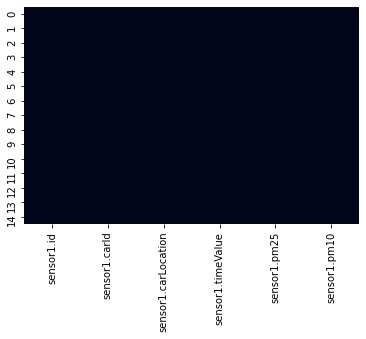

In [60]:
print("Sensor 1")
sns.heatmap(dataSensor1.isnull(), cbar=False)
dataSensor1.info()

Sensor 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sensor2.id           15 non-null     int64  
 1   sensor2.carId        15 non-null     object 
 2   sensor2.carLocation  15 non-null     object 
 3   sensor2.timeValue    15 non-null     object 
 4   sensor2.temperature  15 non-null     float64
 5   sensor2.gas          15 non-null     int64  
 6   sensor2.humidity     15 non-null     float64
 7   sensor2.pressure     15 non-null     float64
 8   sensor2.altitude     15 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ KB


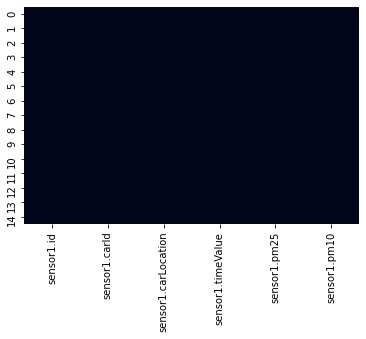

In [83]:
print("Sensor 2")
sns.heatmap(dataSensor1.isnull(), cbar=False)
dataSensor2.info()

### 3.3 Outliers

Here we are going to check if there are any outlier in our dataframes, and handle with them 

#### Sensor 1

Sensor1 BoxPlot


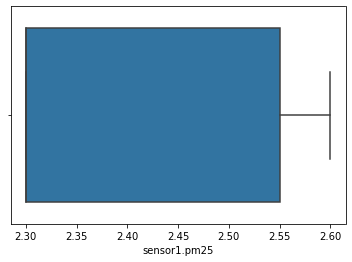

In [80]:
print("Sensor1 BoxPlot")
sns.boxplot(x=dataSensor1['sensor1.pm25'])

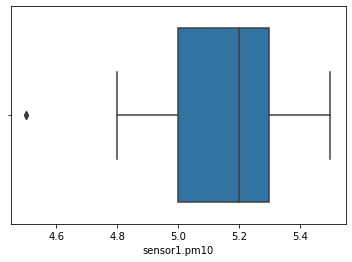

In [81]:
sns.boxplot(x=dataSensor1['sensor1.pm10'])

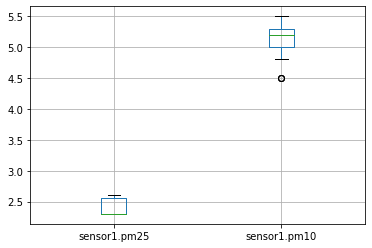

In [77]:
particles = dataSensor1[['sensor1.pm25', 'sensor1.pm10']]
particles.boxplot()

#### Sensor 2

Sensor2 BoxPlot


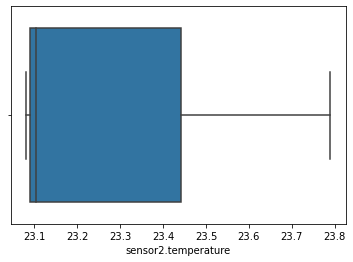

In [84]:
print("Sensor2 BoxPlot")
sns.boxplot(x=dataSensor2['sensor2.temperature'])

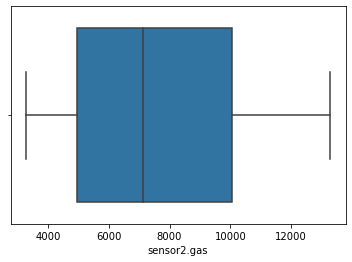

In [87]:
sns.boxplot(x=dataSensor2['sensor2.gas'])

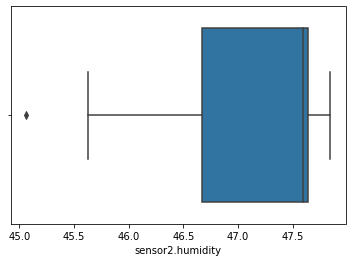

In [88]:
sns.boxplot(x=dataSensor2['sensor2.humidity'])

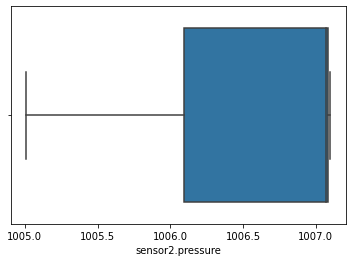

In [89]:
sns.boxplot(x=dataSensor2['sensor2.pressure'])

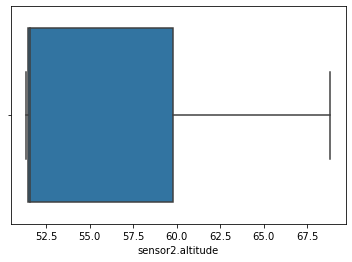

In [90]:
sns.boxplot(x=dataSensor2['sensor2.altitude'])

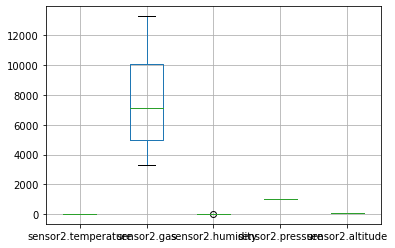

In [93]:
metrics = dataSensor2[['sensor2.temperature', 'sensor2.gas', 'sensor2.humidity', 'sensor2.pressure', 'sensor2.altitude']]
metrics.boxplot()

Now that we have spotted some outliers, its time to get rid of them

#### Z-score method

In [132]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

##### Sensor1

In [96]:
z = np.abs(stats.zscore(particles))
print(z)

[[0.         1.24154139]
 [0.75955453 1.81142924]
 [0.75955453 1.81142924]
 [0.75955453 1.81142924]
 [0.75955453 0.89553805]
 [0.75955453 0.63094726]
 [0.75955453 0.63094726]
 [0.75955453 0.63094726]
 [0.75955453 0.63094726]
 [0.75955453 0.63094726]
 [0.75955453 0.63094726]
 [1.51910905 0.3256502 ]
 [1.51910905 0.3256502 ]
 [1.51910905 0.3256502 ]
 [1.51910905 0.3256502 ]]


In [131]:
threshold = 3
print(np.where(z > threshold))

(array([], dtype=int64), array([], dtype=int64))


In [133]:
for colum in particles:
    print("Outliers de %s: %s" % (colum,detect_outlier(particles[colum])))

Outliers de sensor1.pm25: []
Outliers de sensor1.pm10: []


##### Sensor2

In [128]:
z = np.abs(stats.zscore(metrics))
print(z)

[[1.69120839 1.78125445 2.12994506 1.73479552 1.73485834]
 [1.65375036 0.86864518 1.52965858 1.61092404 1.61088565]
 [1.64406294 1.27434563 1.5171999  1.64761018 1.64760062]
 [1.6408338  1.63914827 1.35695189 1.63767367 1.63765621]
 [0.55304409 1.0830944  0.50634919 0.58543496 0.58544869]
 [0.55950237 0.89911765 0.48019115 0.58964465 0.58965503]
 [0.56983562 0.62251812 0.53808978 0.58973694 0.58974725]
 [0.5762939  0.348139   0.55079743 0.59394654 0.59395348]
 [0.58662715 0.05694821 0.5309615  0.59990026 0.59990242]
 [0.59696039 0.22282334 0.55647653 0.60390004 0.60389898]
 [0.61181444 0.52638498 0.56238076 0.60732941 0.60732558]
 [0.62731431 0.85468832 0.61362225 0.61039804 0.61039172]
 [0.64216836 1.11162137 0.65841963 0.60991952 0.60991359]
 [0.65250161 1.39424772 0.73582646 0.61587267 0.61586189]
 [0.65379326 0.17746355 0.80064076 0.62492039 0.6249022 ]]


In [134]:
print(np.where(z > threshold))

(array([], dtype=int64), array([], dtype=int64))


In [135]:
for colum in metrics:
    print("Outliers de %s: %s" % (colum,detect_outlier(metrics[colum])))

Outliers de sensor2.temperature: []
Outliers de sensor2.gas: []
Outliers de sensor2.humidity: []
Outliers de sensor2.pressure: []
Outliers de sensor2.altitude: []


#### IRQ method

In [212]:
def iqr_outlier_finder(data):
    outlier =[] 
    for x in data: 
        if ((x> upper_bound) or (x<lower_bound)): 
             outlier.append(x)
    return outlier

##### Sensor 1

In [208]:
particlesSorted = shuffle(particles)

In [209]:
q1, q3= np.percentile(particlesSorted,[25,75])

In [210]:
iqr = q3 - q1

In [211]:
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

-2.0500000000000007
9.55


In [213]:
for colum in particlesSorted:
    outs = iqr_outlier_finder(particlesSorted[colum])
    print(' outlier in the %s is %s' % (colum, len(outs))) 

 outlier in the sensor1.pm25 is 0
 outlier in the sensor1.pm10 is 0


##### Sensor 2

In [216]:
metricsSorted = shuffle(metrics)

In [217]:
q1, q3= np.percentile(metricsSorted,[25,75])

In [218]:
iqr = q3 - q1

In [219]:
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

-1393.9651802140702
2447.716979136234


In [220]:
for colum in metricsSorted:
    outs = iqr_outlier_finder(metricsSorted[colum])
    print(' outlier in the %s is %s' % (colum, len(outs))) 

 outlier in the sensor2.temperature is 0
 outlier in the sensor2.gas is 15
 outlier in the sensor2.humidity is 0
 outlier in the sensor2.pressure is 0
 outlier in the sensor2.altitude is 0


### 3.4 Normalização

## 4. Create clean data files
The last step of the task is save the previous cleaned data, so that it can be used in the future.